# Titanic - Machine Learning - Classification

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*iOCbIdKMy2I2sUsNBMES5Q.jpeg" width="800" height="400">

## It is a machine learning project aimed at predicting the survival likelihood of passengers in the 1912 Titanic disaster.

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('ttrain.csv')
df2=pd.read_csv('ttest.csv')

### EDA (Exploratory Data Analysis)

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df=pd.concat([df1,df2])

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(1309, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df['Age'].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

####To better fill in the missing values in the Age column, the titles (Mr., Mrs., Miss, etc.) from the Name column were extracted through feature engineering. This way, the title information was used to make more accurate and meaningful predictions of passengers' ages, enhancing the understanding of the data and improving model performance.

In [11]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [12]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [13]:

df['Title'] = df['Title'].replace([
    'Rev', 'Dr', 'Col', 'Major', 'Sir', 'Don', 'Capt', 'Jonkheer'], 'Mr')


df['Title'] = df['Title'].replace([
    'Mlle', 'Ms'], 'Miss')


df['Title'] = df['Title'].replace([
    'Lady', 'Mme', 'Countess', 'Dona'], 'Mrs')


In [14]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

The AGE column was filled using the TITLE column.

In [15]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [17]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [18]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [19]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [21]:
df=df.drop(['Cabin','Ticket','PassengerId','Name'],axis=1)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-23-df886e3bb104>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='viridis')


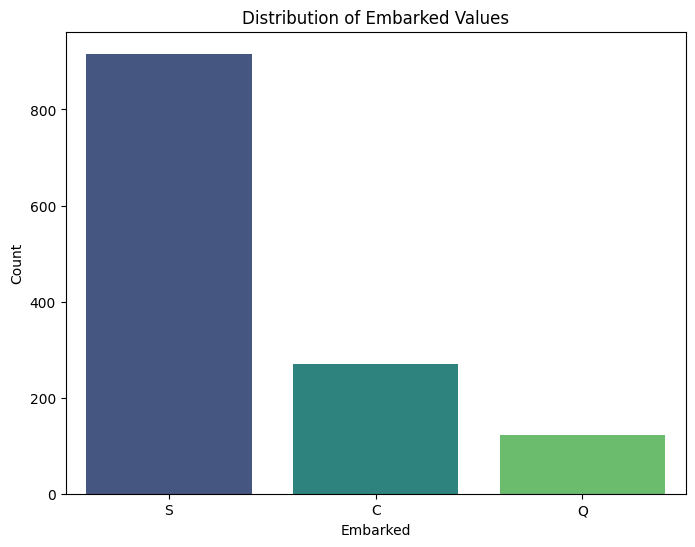

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df, palette='viridis')
plt.title('Distribution of Embarked Values')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

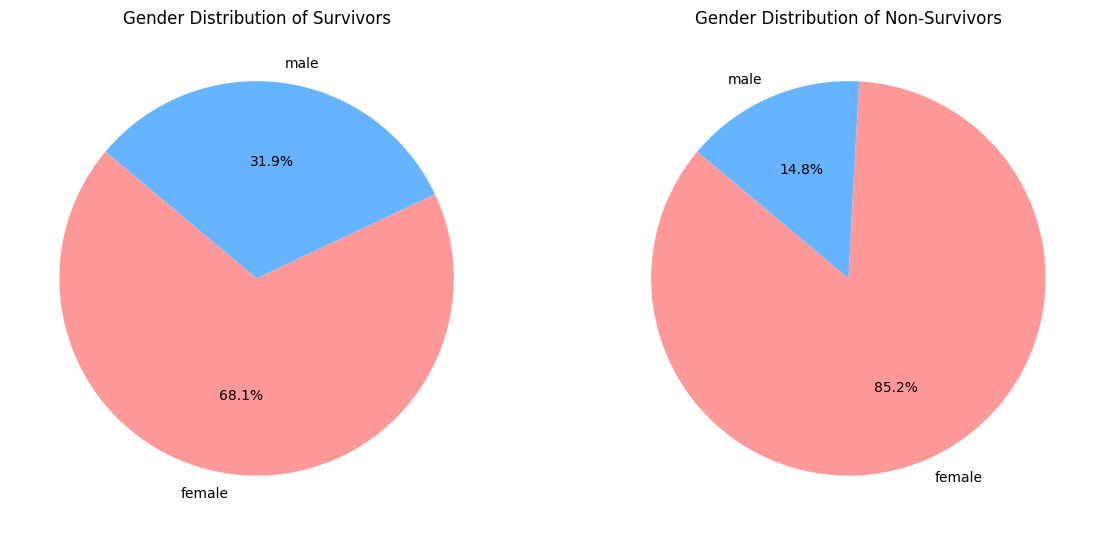

In [24]:
survived_sex_distribution = df[df['Survived'] == 1]['Sex'].value_counts()
not_survived_sex_distribution = df[df['Survived'] == 0]['Sex'].value_counts()

labels = survived_sex_distribution.index
sizes_survived = survived_sex_distribution.values
sizes_not_survived = not_survived_sex_distribution.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(sizes_survived, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
ax1.set_title('Gender Distribution of Survivors')

ax2.pie(sizes_not_survived, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
ax2.set_title('Gender Distribution of Non-Survivors')

plt.show()

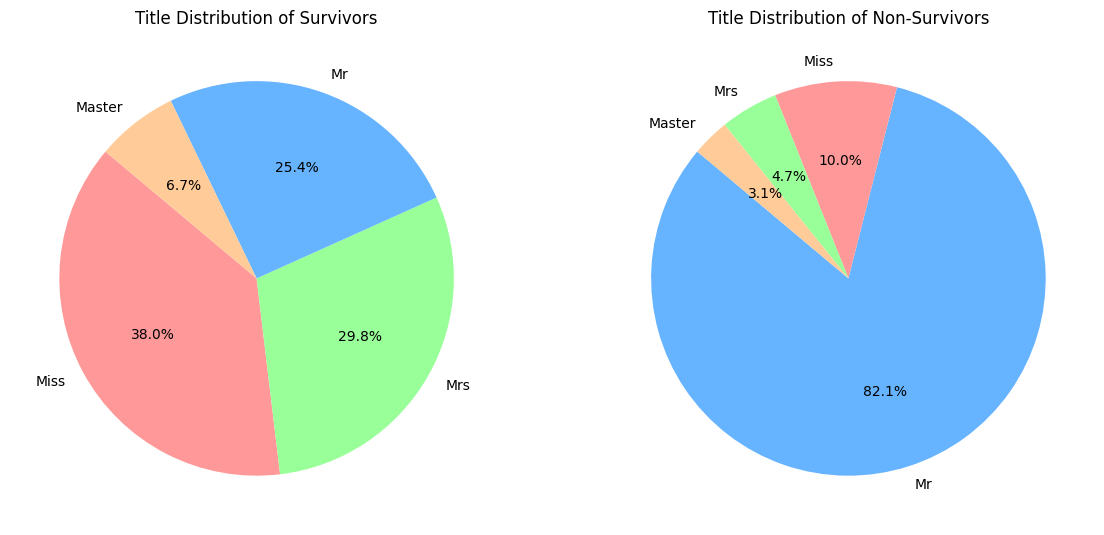

In [25]:
survived_title_distribution = df[df['Survived'] == 1]['Title'].value_counts()
not_survived_title_distribution = df[df['Survived'] == 0]['Title'].value_counts()

labels_survived = survived_title_distribution.index
sizes_survived = survived_title_distribution.values

labels_not_survived = not_survived_title_distribution.index
sizes_not_survived = not_survived_title_distribution.values

colors = ['#ff9999',  '#99ff99','#66b3ff', '#ffcc99']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(sizes_survived, labels=labels_survived, autopct='%1.1f%%', colors=colors, startangle=140)
ax1.set_title('Title Distribution of Survivors')

colors = ['#66b3ff','#ff9999', '#99ff99',  '#ffcc99']
ax2.pie(sizes_not_survived, labels=labels_not_survived, autopct='%1.1f%%', colors=colors, startangle=140)
ax2.set_title('Title Distribution of Non-Survivors')

plt.show()

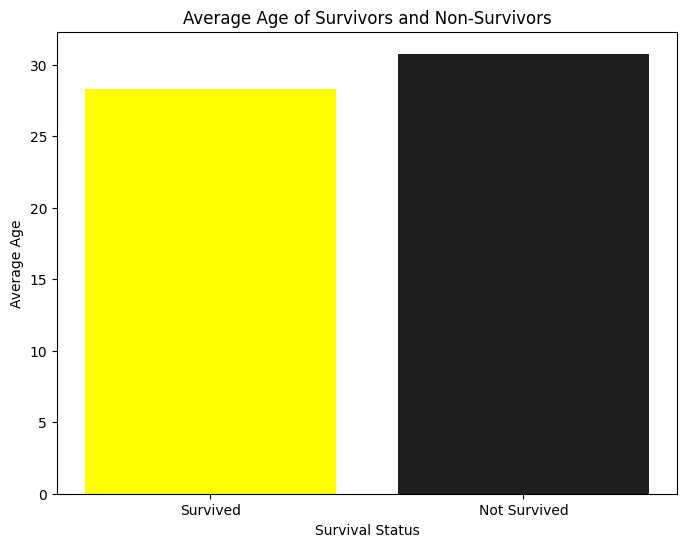

In [26]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

fig, ax = plt.subplots(figsize=(8, 6))

categories = ['Survived', 'Not Survived']
average_ages = [average_age_survived, average_age_not_survived]
colors = ['#ffff00', '#1f1d1d']

ax.bar(categories, average_ages, color=colors)
ax.set_xlabel('Survival Status')
ax.set_ylabel('Average Age')
ax.set_title('Average Age of Survivors and Non-Survivors')

plt.show()

In [27]:
df=pd.get_dummies(df,drop_first=True)

In [28]:
train=df[:891]
test=df[891:]

In [29]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.000000,1,0,7.2500,True,False,True,False,True,False
1,1.0,1,38.000000,1,0,71.2833,False,False,False,False,False,True
2,1.0,3,26.000000,0,0,7.9250,False,False,True,True,False,False
3,1.0,1,35.000000,1,0,53.1000,False,False,True,False,False,True
4,0.0,3,35.000000,0,0,8.0500,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.000000,0,0,13.0000,True,False,True,False,True,False
887,1.0,1,19.000000,0,0,30.0000,False,False,True,True,False,False
888,0.0,3,21.824366,1,2,23.4500,False,False,True,True,False,False
889,1.0,1,26.000000,0,0,30.0000,True,False,False,False,True,False


In [30]:
x=train.drop(['Survived'],axis=1)
y=train[['Survived']]

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [33]:
g=GaussianNB()
b=BernoulliNB()
r=RandomForestClassifier()
gr=GradientBoostingClassifier()

In [34]:
model=g.fit(x_train,y_train)
tahmin=model.predict(x_test)
accuracy_score(tahmin,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.776536312849162

In [35]:
model2=b.fit(x_train,y_train)
tahmin2=model2.predict(x_test)
accuracy_score(tahmin2,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7877094972067039

In [36]:
model3=r.fit(x_train,y_train)
tahmin3=model3.predict(x_test)
accuracy_score(tahmin3,y_test)

<ipython-input-36-6c8ca860be3a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3=r.fit(x_train,y_train)


0.8156424581005587

In [37]:
model4=gr.fit(x_train,y_train)
tahmin4=model4.predict(x_test)
accuracy_score(tahmin4,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8268156424581006

In [38]:
del test['Survived']

Instead of using the split data, the entire dataset was used for training to prevent data loss and achieve better training before fitting the test data.

In [39]:
model5=gr.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
tahmin5=model5.predict(test)

In [41]:
df2['Survived']=tahmin5

With our model, we visualized the predicted survival status data using the gender column.

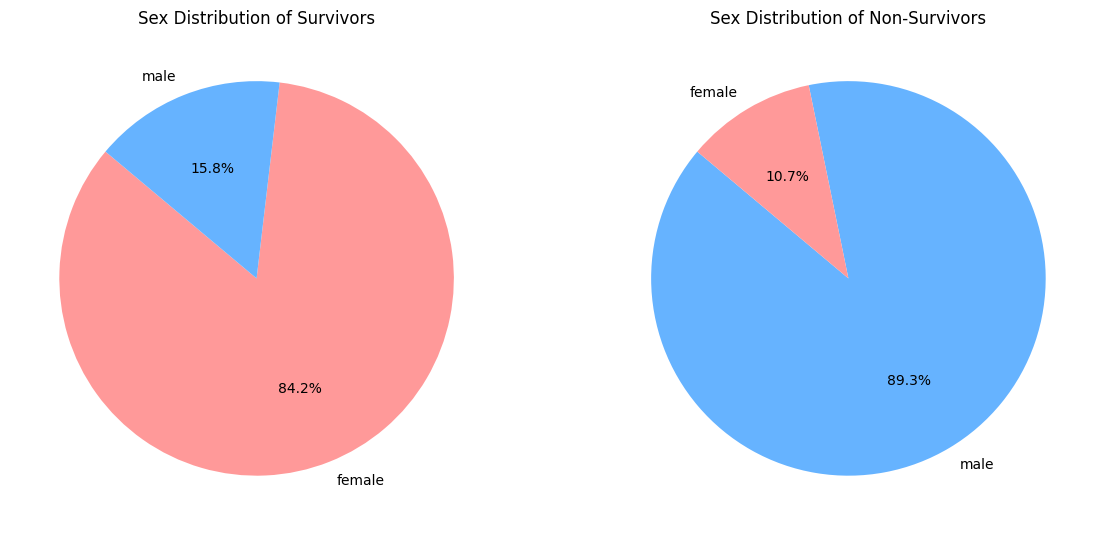

In [42]:

survived_sex_distribution = df2[df2['Survived'] == 1]['Sex'].value_counts()
not_survived_sex_distribution = df2[df2['Survived'] == 0]['Sex'].value_counts()

labels_survived = survived_sex_distribution.index
sizes_survived = survived_sex_distribution.values

labels_not_survived = not_survived_sex_distribution.index
sizes_not_survived = not_survived_sex_distribution.values


colors = ['#ff9999', '#66b3ff']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))


ax1.pie(sizes_survived, labels=labels_survived, autopct='%1.1f%%', colors=colors, startangle=140)
ax1.set_title('Sex Distribution of Survivors')
colors = ['#66b3ff','#ff9999']

ax2.pie(sizes_not_survived, labels=labels_not_survived, autopct='%1.1f%%', colors=colors, startangle=140)
ax2.set_title('Sex Distribution of Non-Survivors')

plt.show()
plt.show()

In [43]:
sonuc=pd.DataFrame()

In [44]:
tahmin5

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [45]:
sonuc['PassengerId']=df2['PassengerId']
sonuc['Survived']=tahmin5

In [46]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

In [47]:
sonuc.to_csv('TitanicPredict.csv',index=False)

The model with the highest accuracy, GradientBoostingClassifier, was trained on the entire training dataset and predictions were made on the test data. The accuracy was measured at 82%. The average age, titles, and gender of survivors and non-survivors were illustrated with graphs.

The results were formatted appropriately for submission to Kaggle.